<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 2</h3>
    <h3>Ejercicio 3</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno <p>
</div>

https://www.estadisticaciudad.gob.ar/eyc/?p=27702

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error


In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/MA_AX01%20.csv'
datatemperatura = pd.read_csv(url)

In [ ]:
datatemperatura.head()

,Fecha,Media,Maxima,Minima
0,Jan-91,24.0,28.4,19.8
1,Feb-91,22.9,27.8,17.8
2,Mar-91,22.7,27.6,18.4
3,Apr-91,17.8,22.4,13.6
4,May-91,16.0,20.7,12.2


In [ ]:
date_range = pd.date_range(start='1991-01-01', end='2024-04-30', freq='M')


df = pd.DataFrame({'Date': date_range})



print(df.head())

print(df.tail())

        Date
0 1991-01-31
1 1991-02-28
2 1991-03-31
3 1991-04-30
4 1991-05-31
          Date
395 2023-12-31
396 2024-01-31
397 2024-02-29
398 2024-03-31
399 2024-04-30


<ipython-input-6-786dbd656876>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='1991-01-01', end='2024-04-30', freq='M')


In [ ]:
datatemperatura['Dias'] = date_range

In [ ]:
datatemperatura.tail()

,Fecha,Media,Maxima,Minima,Dias
395,23-Dec,23.1,27.7,18.4,2023-12-31
396,24-Jan,25.5,30.2,21.4,2024-01-31
397,24-Feb,26.0,30.5,22.1,2024-02-29
398,24-Mar,22.9,27.4,19.2,2024-03-31
399,24-Apr,18.7,22.6,14.9,2024-04-30


In [ ]:
datatemperatura.dtypes

,0
Fecha,object
Media,float64
Maxima,float64
Minima,float64
Dias,datetime64[ns]


In [ ]:
datatemperatura.index = datatemperatura['Dias']
del datatemperatura['Fecha']
del datatemperatura['Dias']

In [ ]:
datatemperatura.head()

,Media,Maxima,Minima
Dias,,,
1991-01-31,24.0,28.4,19.8
1991-02-28,22.9,27.8,17.8
1991-03-31,22.7,27.6,18.4
1991-04-30,17.8,22.4,13.6
1991-05-31,16.0,20.7,12.2


<Axes: xlabel='Dias'>

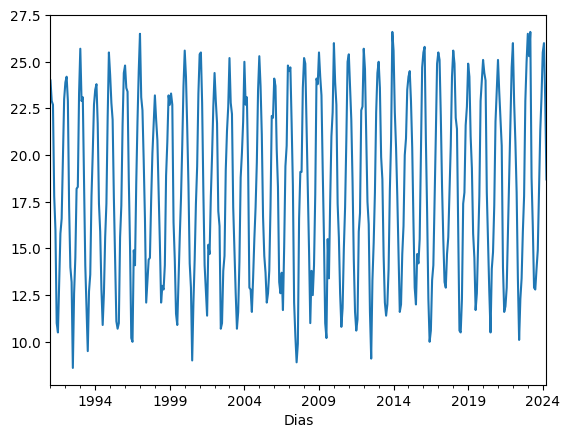

In [ ]:
datatemperatura.Media.plot()

In [ ]:
len(datatemperatura)

400

In [ ]:
X = datatemperatura[['Media']]
train, test = X[0:-24], X[-24:]
X.head()

,Media
Dias,
1991-01-31,24.0
1991-02-28,22.9
1991-03-31,22.7
1991-04-30,17.8
1991-05-31,16.0


**Hacemos diferentes transformaciones de la serie original **

# Primera = promedio móvil de 12 periodos

In [ ]:
datatemperatura_prom_mov = datatemperatura.copy()
datatemperatura_prom_mov['promedio_movil_7'] = datatemperatura_prom_mov['Media'].rolling(window=7).mean()


In [ ]:
datatemperatura_prom_mov.head(12)

,Media,Maxima,Minima,promedio_movil_7
Dias,,,,
1991-01-31,24.0,28.4,19.8,NaN
1991-02-28,22.9,27.8,17.8,NaN
1991-03-31,22.7,27.6,18.4,NaN
1991-04-30,17.8,22.4,13.6,NaN
1991-05-31,16.0,20.7,12.2,NaN
1991-06-30,11.0,14.8,7.6,NaN
1991-07-31,10.5,14.8,6.7,17.842857
1991-08-31,13.2,17.1,9.3,16.300000
1991-09-30,15.8,20.5,11.7,15.285714


In [ ]:
indices_a_eliminar = ['1991-01-31','1991-02-28','1991-03-31','1991-04-30','1991-05-31','1991-06-30']

datatemperatura_prom_mov = datatemperatura_prom_mov.drop(indices_a_eliminar)

In [ ]:
datatemperatura_prom_mov.head(12)

,Media,Maxima,Minima,promedio_movil_7
Dias,,,,
1991-07-31,10.5,14.8,6.7,17.842857
1991-08-31,13.2,17.1,9.3,16.300000
1991-09-30,15.8,20.5,11.7,15.285714
1991-10-31,16.6,21.1,12.2,14.414286
1991-11-30,19.7,24.3,15.3,14.685714
1991-12-31,23.0,27.8,18.7,15.685714
1992-01-31,23.9,28.5,19.8,17.528571
1992-02-29,24.2,29.0,19.8,19.485714
1992-03-31,22.9,27.4,18.9,20.871429


<Axes: xlabel='Dias'>

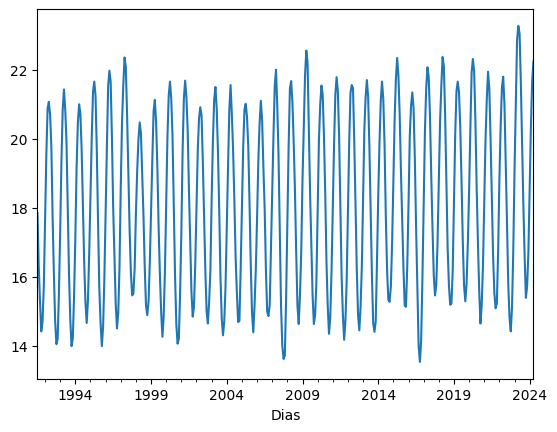

In [ ]:
datatemperatura_prom_mov.promedio_movil_7.plot()

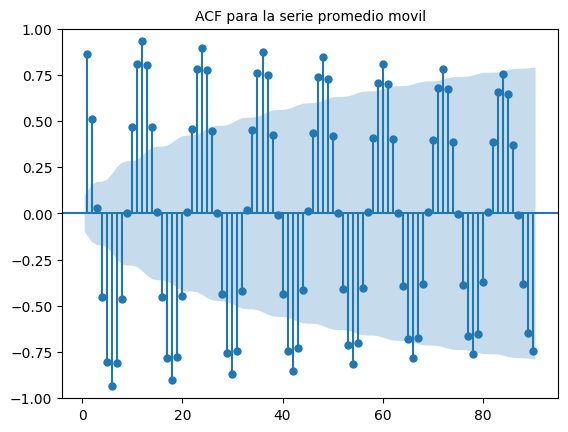

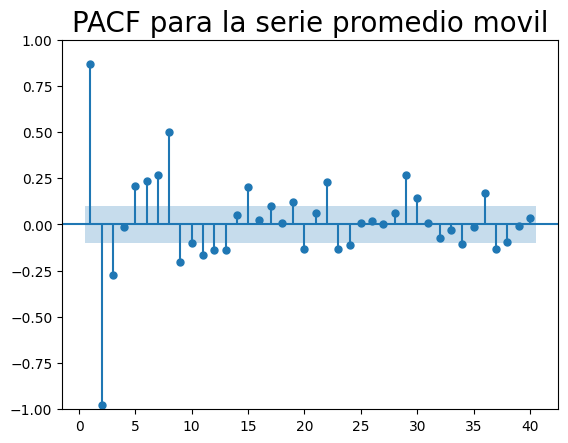

In [ ]:
sgt.plot_acf(datatemperatura_prom_mov.promedio_movil_7 , zero = False, lags = 90)
plt.title("ACF para la serie promedio movil", size = 10)
plt.show()

sgt.plot_pacf(datatemperatura_prom_mov.promedio_movil_7, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF para la serie promedio movil", size = 20)
plt.show()

# Segunda transformacion = quitarle el componente estacional

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

datatemperatura_3 = datatemperatura.copy()
result = seasonal_decompose(datatemperatura_3['Media'], model='additive', period=12)
datatemperatura_3['deseasonalizada'] = datatemperatura_3['Media'] - result.seasonal

# Codigo opcional
datatemperatura_3.dropna(inplace=True)

In [ ]:
datatemperatura_3.head()

,Media,Maxima,Minima,deseasonalizada
Dias,,,,
1991-01-31,24.0,28.4,19.8,17.117464
1991-02-28,22.9,27.8,17.8,17.196370
1991-03-31,22.7,27.6,18.4,18.777360
1991-04-30,17.8,22.4,13.6,17.637646
1991-05-31,16.0,20.7,12.2,19.369938


<Axes: xlabel='Dias'>

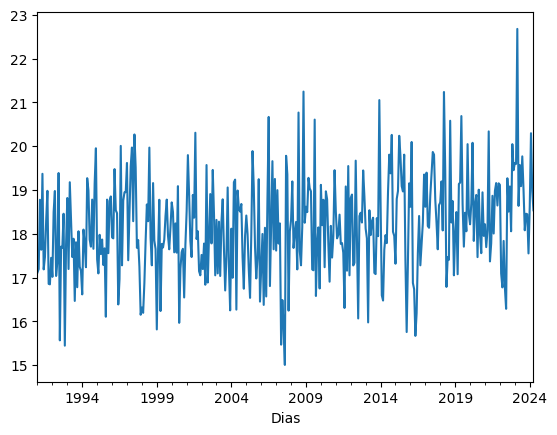

In [ ]:
datatemperatura_3.deseasonalizada.plot()

In [ ]:
X_3 = datatemperatura_3[['deseasonalizada' ]]
train_3, test_3 = X_3[0:-24], X_3[-24:]
X_3.head()

,deseasonalizada
Dias,
1991-01-31,17.117464
1991-02-28,17.196370
1991-03-31,18.777360
1991-04-30,17.637646
1991-05-31,19.369938


# Tercer transformacion = diferenciacion de la serie ya deseasonalizada

In [ ]:
datatemperatura_4 = datatemperatura_3.copy()
datatemperatura_4['deseasonalizada'] = datatemperatura_4['deseasonalizada'].diff()

In [ ]:
datatemperatura_4.head(7)

,Media,Maxima,Minima,deseasonalizada
Dias,,,,
1991-01-31,24.0,28.4,19.8,NaN
1991-02-28,22.9,27.8,17.8,0.078906
1991-03-31,22.7,27.6,18.4,1.580990
1991-04-30,17.8,22.4,13.6,-1.139714
1991-05-31,16.0,20.7,12.2,1.732292
1991-06-30,11.0,14.8,7.6,-2.182161
1991-07-31,10.5,14.8,6.7,0.280165


In [ ]:
indices_a_eliminar = ['1991-01-31']

datatemperatura_4 = datatemperatura_4.drop(indices_a_eliminar)

In [ ]:
datatemperatura_4.head(4)

,Media,Maxima,Minima,deseasonalizada
Dias,,,,
1991-02-28,22.9,27.8,17.8,0.078906
1991-03-31,22.7,27.6,18.4,1.580990
1991-04-30,17.8,22.4,13.6,-1.139714
1991-05-31,16.0,20.7,12.2,1.732292


In [ ]:
X_4 = datatemperatura_4[['deseasonalizada' ]]
train_4, test_4 = X_4[0:-24], X_4[-24:]
X_4.head()

,deseasonalizada
Dias,
1991-02-28,0.078906
1991-03-31,1.580990
1991-04-30,-1.139714
1991-05-31,1.732292
1991-06-30,-2.182161


# Cuarta transformacion = diferenciacion

In [ ]:
# Aplicar diferenciación
datatemperatura_dif = datatemperatura.copy()
datatemperatura_dif['Valor_Dif'] = datatemperatura_dif['Media'].diff()

In [ ]:
datatemperatura_dif.head(2)

,Media,Maxima,Minima,Valor_Dif
Dias,,,,
1991-01-31,24.0,28.4,19.8,NaN
1991-02-28,22.9,27.8,17.8,-1.1


In [ ]:
indices_a_eliminar = ['1991-01-31']

datatemperatura_dif = datatemperatura_dif.drop(indices_a_eliminar)

In [ ]:
X_diff = datatemperatura_dif[['Valor_Dif' ]]
train_diff, test_diff = X_diff[0:-24], X_diff[-24:]
X_diff.head()

,Valor_Dif
Dias,
1991-02-28,-1.1
1991-03-31,-0.2
1991-04-30,-4.9
1991-05-31,-1.8
1991-06-30,-5.0


# Quinta transformacion = Promedios Móviles


In [ ]:
# Suponiendo que 'value' es la columna con tus datos de serie temporal

datatemperatura_prom_mov = datatemperatura.copy()

datatemperatura_prom_mov['rolling_mean'] = datatemperatura_prom_mov['Media'].rolling(window=6).mean()

# Puedes restar el promedio móvil de los datos originales para eliminar la estacionalidad
datatemperatura_prom_mov['deseasonalized'] = datatemperatura_prom_mov['Media'] - datatemperatura_prom_mov['rolling_mean']


In [ ]:
datatemperatura_prom_mov.head(7)

,Media,Maxima,Minima,rolling_mean,deseasonalized
Dias,,,,,
1991-01-31,24.0,28.4,19.8,NaN,NaN
1991-02-28,22.9,27.8,17.8,NaN,NaN
1991-03-31,22.7,27.6,18.4,NaN,NaN
1991-04-30,17.8,22.4,13.6,NaN,NaN
1991-05-31,16.0,20.7,12.2,NaN,NaN
1991-06-30,11.0,14.8,7.6,19.066667,-8.066667
1991-07-31,10.5,14.8,6.7,16.816667,-6.316667


In [ ]:
indices_a_eliminar = ['1991-01-31'	,'1991-02-28','1991-03-31','1991-04-30','1991-05-31']


datatemperatura_prom_mov = datatemperatura_prom_mov.drop(indices_a_eliminar)

In [ ]:
datatemperatura_prom_mov.head()

,Media,Maxima,Minima,rolling_mean,deseasonalized
Dias,,,,,
1991-06-30,11.0,14.8,7.6,19.066667,-8.066667
1991-07-31,10.5,14.8,6.7,16.816667,-6.316667
1991-08-31,13.2,17.1,9.3,15.200000,-2.000000
1991-09-30,15.8,20.5,11.7,14.050000,1.750000
1991-10-31,16.6,21.1,12.2,13.850000,2.750000


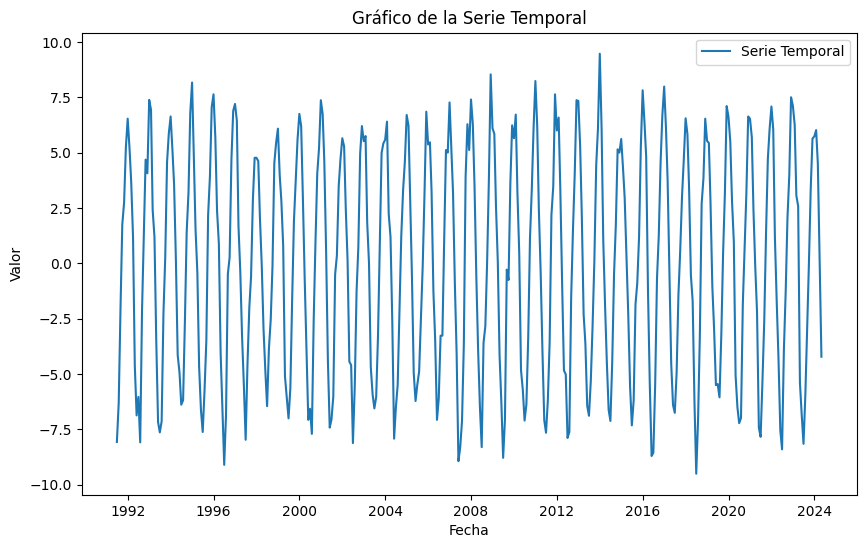

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(datatemperatura_prom_mov.index, datatemperatura_prom_mov['deseasonalized'], label='Serie Temporal')
plt.title('Gráfico de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [ ]:
X_prom_mov = datatemperatura_prom_mov[['deseasonalized' ]]
train_prom_mov, test_prom_mov = X_prom_mov[0:-24], X_prom_mov[-24:]
train_prom_mov.head()

,deseasonalized
Dias,
1991-06-30,-8.066667
1991-07-31,-6.316667
1991-08-31,-2.000000
1991-09-30,1.750000
1991-10-31,2.750000


# Sexta transformacion = Diferenciacion de la serie diferenciada

In [ ]:
# Aplicar diferenciación
period = 6  # Período de estacionalidad (diferenciación cada 6 periodos)

datatemperatura_dif_dif6 = datatemperatura_dif.copy()
datatemperatura_dif_dif6['Valor_Dif'] = datatemperatura_dif_dif6['Media'].diff(periods=period)

In [ ]:
datatemperatura_dif_dif6.head(7)

,Media,Maxima,Minima,Valor_Dif
Dias,,,,
1991-02-28,22.9,27.8,17.8,NaN
1991-03-31,22.7,27.6,18.4,NaN
1991-04-30,17.8,22.4,13.6,NaN
1991-05-31,16.0,20.7,12.2,NaN
1991-06-30,11.0,14.8,7.6,NaN
1991-07-31,10.5,14.8,6.7,NaN
1991-08-31,13.2,17.1,9.3,-9.7


In [ ]:
indices_a_eliminar = ['1991-02-28','1991-03-31','1991-04-30','1991-05-31','1991-06-30','1991-07-31	']

datatemperatura_dif_dif6 = datatemperatura_dif_dif6.drop(indices_a_eliminar)

In [ ]:
datatemperatura_dif_dif6.head()

,Media,Maxima,Minima,Valor_Dif
Dias,,,,
1991-08-31,13.2,17.1,9.3,-9.7
1991-09-30,15.8,20.5,11.7,-6.9
1991-10-31,16.6,21.1,12.2,-1.2
1991-11-30,19.7,24.3,15.3,3.7
1991-12-31,23.0,27.8,18.7,12.0


In [ ]:
X_diff1_6 = datatemperatura_dif_dif6[['Valor_Dif' ]]
train_diff1_6, test_diff1_16 = X_diff1_6[0:-24], X_diff1_6[-24:]
X_diff1_6.head()

,Valor_Dif
Dias,
1991-08-31,-9.7
1991-09-30,-6.9
1991-10-31,-1.2
1991-11-30,3.7
1991-12-31,12.0


# Septima transfomracion = Diferenciacion cada 6 periodos

In [ ]:
# Aplicar diferenciación estacional
period = 6  # Período de estacionalidad (diferenciación cada 6 periodos)
datatemperatura_dif6 = datatemperatura.copy()
datatemperatura_dif6['Valor_Dif6'] = datatemperatura_dif6['Media'].diff(periods=period)

In [ ]:
datatemperatura_dif6.head(7)

,Media,Maxima,Minima,Valor_Dif6
Dias,,,,
1991-01-31,24.0,28.4,19.8,NaN
1991-02-28,22.9,27.8,17.8,NaN
1991-03-31,22.7,27.6,18.4,NaN
1991-04-30,17.8,22.4,13.6,NaN
1991-05-31,16.0,20.7,12.2,NaN
1991-06-30,11.0,14.8,7.6,NaN
1991-07-31,10.5,14.8,6.7,-13.5


In [ ]:
X_diff1_6 = datatemperatura_dif6[['Valor_Dif6' ]]
train_diff1_6, test_diff1_16 = X_diff1_6[0:-24], X_diff1_6[-24:]
X_diff1_6.head(7)

,Valor_Dif6
Dias,
1991-01-31,NaN
1991-02-28,NaN
1991-03-31,NaN
1991-04-30,NaN
1991-05-31,NaN
1991-06-30,NaN
1991-07-31,-13.5


In [ ]:
indices_a_eliminar = ['1991-01-31'	,'1991-02-28','1991-03-31','1991-04-30','1991-05-31','1991-06-30']

datatemperatura_dif6 = datatemperatura_dif6.drop(indices_a_eliminar)

In [ ]:
datatemperatura_dif6.head()

,Media,Maxima,Minima,Valor_Dif6
Dias,,,,
1991-07-31,10.5,14.8,6.7,-13.5
1991-08-31,13.2,17.1,9.3,-9.7
1991-09-30,15.8,20.5,11.7,-6.9
1991-10-31,16.6,21.1,12.2,-1.2
1991-11-30,19.7,24.3,15.3,3.7


In [ ]:
X_diff6 = datatemperatura_dif6[['Valor_Dif6' ]]
train_diff6, test_diff6 = X_diff6[0:-24], X_diff6[-24:]
X_diff6.head()

,Valor_Dif6
Dias,
1991-07-31,-13.5
1991-08-31,-9.7
1991-09-30,-6.9
1991-10-31,-1.2
1991-11-30,3.7


# Octava = Diferencia cada 12 periodos

In [ ]:
# Aplicar diferenciación estacional
period = 12
datatemperatura_dif12 = datatemperatura.copy()
datatemperatura_dif12['Valor_Dif12'] = datatemperatura_dif12['Media'].diff(periods=period)

In [ ]:
datatemperatura_dif12.head(12)

,Media,Maxima,Minima,Valor_Dif12
Dias,,,,
1991-01-31,24.0,28.4,19.8,NaN
1991-02-28,22.9,27.8,17.8,NaN
1991-03-31,22.7,27.6,18.4,NaN
1991-04-30,17.8,22.4,13.6,NaN
1991-05-31,16.0,20.7,12.2,NaN
1991-06-30,11.0,14.8,7.6,NaN
1991-07-31,10.5,14.8,6.7,NaN
1991-08-31,13.2,17.1,9.3,NaN
1991-09-30,15.8,20.5,11.7,NaN


In [ ]:
indices_a_eliminar = ['1991-01-31'	,'1991-02-28','1991-03-31','1991-04-30','1991-05-31','1991-06-30','1991-07-31','1991-08-31','1991-09-30','1991-10-31','1991-11-30','1991-12-31']


datatemperatura_dif12 = datatemperatura_dif12.drop(indices_a_eliminar)

In [ ]:
datatemperatura_dif12.head()

,Media,Maxima,Minima,Valor_Dif12
Dias,,,,
1992-01-31,23.9,28.5,19.8,-0.1
1992-02-29,24.2,29.0,19.8,1.3
1992-03-31,22.9,27.4,18.9,0.2
1992-04-30,17.2,21.9,13.2,-0.6
1992-05-31,14.0,18.5,10.1,-2.0


In [ ]:
datatemperatura_dif12 = datatemperatura_dif12[['Valor_Dif12' ]]
train_diff12, test_diff12 = datatemperatura_dif12[0:-24], datatemperatura_dif12[-24:]
datatemperatura_dif12.head()

,Valor_Dif12
Dias,
1992-01-31,-0.1
1992-02-29,1.3
1992-03-31,0.2
1992-04-30,-0.6
1992-05-31,-2.0


# Corremos Modelos

In [ ]:
stepwise_fit = auto_arima(train.Media, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2255.885, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1829.222, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1934.282, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3274.575, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1621.564, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1474.405, Time=0.69 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1369.276, Time=1.71 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=5.91 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1301.622, Time=7.65 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1323.379, Time=4.87 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1308.942, Time=1.40 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1389.662, Time=3.27 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=1316.8

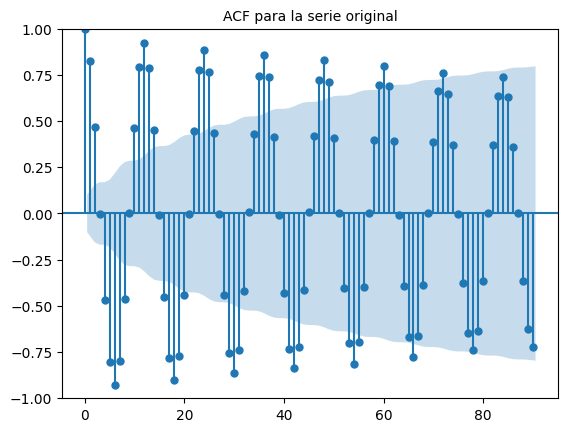

In [ ]:
sgt.plot_acf(train.Media, zero = True, lags = 90)
plt.title("ACF para la serie original", size = 10)
plt.show()

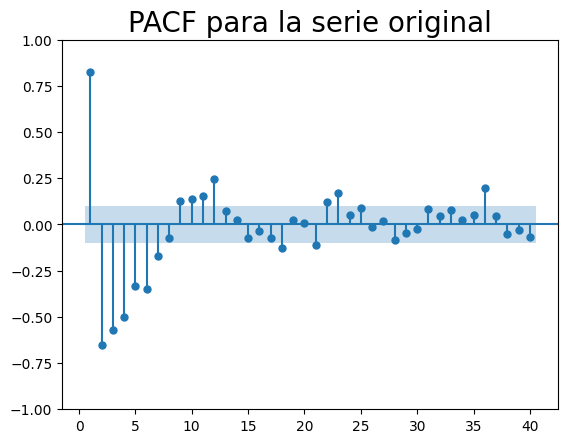

In [ ]:
sgt.plot_pacf(train.Media, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF para la serie original", size = 20)
plt.show()

In [ ]:
import statsmodels.api as sm
modelo1 = sm.tsa.arima.ARIMA(train.Media, order=((4,0,1)))
resultado1 = modelo1.fit()

resultado1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Media   No. Observations:                  376
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -640.184
Date:                Tue, 01 Oct 2024   AIC                           1294.368
Time:                        20:30:34   BIC                           1321.875
Sample:                    01-31-1991   HQIC                          1305.287
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1078      0.049    366.958      0.000      18.011      18.204
ar.L1          1.0615      0.075     14.093      0.000       0.914       1.209
ar.L2         -0.1832      0.094     -1.948      0.051      -0.368       0.001
ar.L3         -0.0816      0.079     -1.031      0.303      -0.237       0.074
ar.L4         -0.3253      0.064     -5.095      0.000      -0.450      -0.200
ma.L1         -0.6294      0.066     -9.583      0.000      -0.758      -0.501
sigma2         1.7374      0.117     14.837      0.000       1.508       1.967
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 6.76
Prob(Q):                              0.46   Prob(JB):                         0.03
Heteroskedasticity (H):               1.09   Skew:                             0.14
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm
modelo2 = sm.tsa.arima.ARIMA(train.Media, order=(((1,1,0,1),0,1)))
resultado2 = modelo2.fit()

resultado2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                      Media   No. Observations:                  376
Model:             ARIMA([1, 2, 4], 0, 1)   Log Likelihood                -640.787
Date:                    Tue, 01 Oct 2024   AIC                           1293.573
Time:                            20:30:40   BIC                           1317.151
Sample:                        01-31-1991   HQIC                          1302.933
                             - 04-30-2022                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1078      0.049    369.071      0.000      18.012      18.204
ar.L1          1.0612      0.075     14.235      0.000       0.915       1.207
ar.L2         -0.2300      0.083     -2.766      0.006      -0.393      -0.067
ar.L4         -0.3724      0.041     -9.011      0.000      -0.453      -0.291
ma.L1         -0.6228      0.064     -9.762      0.000      -0.748      -0.498
sigma2         1.7429      0.118     14.831      0.000       1.513       1.973
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                 5.93
Prob(Q):                              0.31   Prob(JB):                         0.05
Heteroskedasticity (H):               1.09   Skew:                             0.14
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(train_3.deseasonalizada, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1335.016, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1253.904, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1333.016, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1213.703, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1202.355, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1184.642, Time=0.19 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1180.924, Time=0.23 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1178.924, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1182.642, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1131.270, Time=0.45 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1129.779, T

In [ ]:
import statsmodels.api as sm
modelo3 = sm.tsa.arima.ARIMA(train_3.deseasonalizada, order=((1,0,1)))
resultado3 = modelo3.fit()

resultado3.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        deseasonalizada   No. Observations:                  376
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -559.987
Date:                Tue, 01 Oct 2024   AIC                           1127.973
Time:                        20:31:01   BIC                           1143.692
Sample:                    01-31-1991   HQIC                          1134.213
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1038      0.068    266.547      0.000      17.971      18.237
ar.L1          0.4212      0.337      1.250      0.211      -0.239       1.082
ma.L1         -0.2964      0.359     -0.826      0.409      -1.000       0.407
sigma2         1.1511      0.084     13.693      0.000       0.986       1.316
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.94   Prob(JB):                         0.52
Heteroskedasticity (H):               1.18   Skew:                             0.14
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

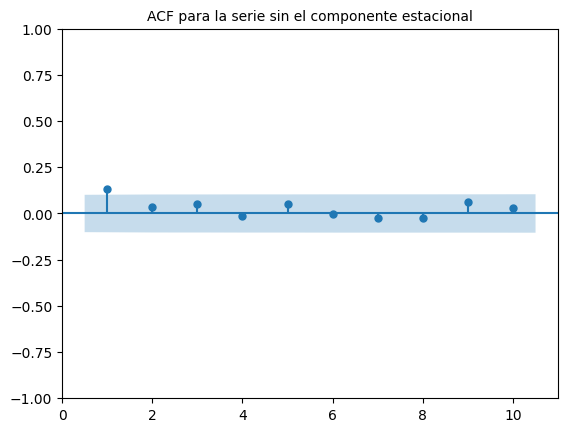

In [ ]:
sgt.plot_acf(train_3.deseasonalizada , zero = False, lags = 10)
plt.title("ACF para la serie sin el componente estacional", size = 10)
plt.show()

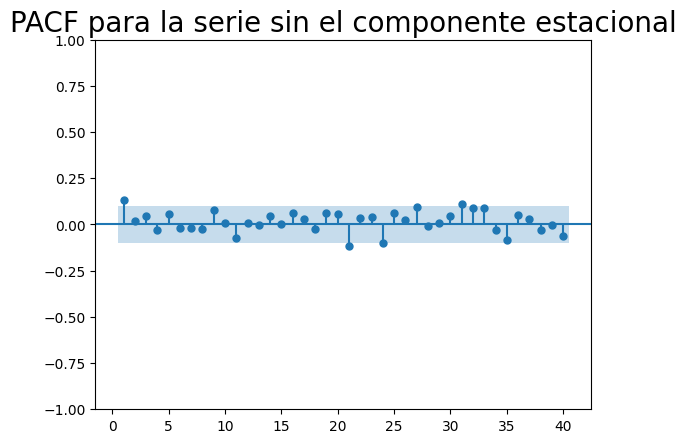

In [ ]:
sgt.plot_pacf(train_3.deseasonalizada, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF para la serie sin el componente estacional", size = 20)
plt.show()

In [ ]:
Augmented_Dickey_Fuller_Test_func(train_3['deseasonalizada'],'deseasonalizada')

Results of Dickey-Fuller Test for column: deseasonalizada
Test Statistic                -1.691600e+01
p-value                        1.002311e-29
No Lags Used                   0.000000e+00
Number of Observations Used    3.750000e+02
Critical Value (1%)           -3.447909e+00
Critical Value (5%)           -2.869278e+00
Critical Value (10%)          -2.570892e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


In [ ]:
Augmented_Dickey_Fuller_Test_func(train_3['deseasonalizada'],'deseasonalizada')

Results of Dickey-Fuller Test for column: deseasonalizada
Test Statistic                -1.691600e+01
p-value                        1.002311e-29
No Lags Used                   0.000000e+00
Number of Observations Used    3.750000e+02
Critical Value (1%)           -3.447909e+00
Critical Value (5%)           -2.869278e+00
Critical Value (10%)          -2.570892e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


In [ ]:
n_adf = ndiffs(train_3['deseasonalizada'], test='adf')
print(f'Estimado de número de diferencias con ADF test es {n_adf}')

Estimado de número de diferencias con ADF test es 0


In [ ]:
# KPSS - Kwiatkowski-Phillips-Schmidt-Shin
n_kpss = ndiffs(train_3['deseasonalizada'], test='kpss')
print(f'Estimado de número de diferencias con KPSS test es {n_kpss}')

Estimado de número de diferencias con KPSS test es 1


In [ ]:
# Phillips-Perron
n_pp = ndiffs(train_3['deseasonalizada'], test='pp')  # -> 0
print(f'Estimado de número de diferencias con PP test es {n_pp}')

Estimado de número de diferencias con PP test es 0


In [ ]:
# Aplicar la diferenciación
stepwise_fit = auto_arima(train_4.deseasonalizada, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1335.016, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1253.904, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1333.016, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1213.703, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1202.355, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1184.642, Time=0.16 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1180.924, Time=0.20 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1178.924, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1182.642, Time=0.10 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1131.270, Time=0.38 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1129.779, T

In [ ]:
# Modelo 4 -

import statsmodels.api as sm
modelo4 = sm.tsa.arima.ARIMA(train_4.deseasonalizada, order=((1,0,1)))
resultado4 = modelo4.fit()

resultado4.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        deseasonalizada   No. Observations:                  375
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -557.214
Date:                Tue, 01 Oct 2024   AIC                           1122.427
Time:                        20:31:39   BIC                           1138.135
Sample:                    02-28-1991   HQIC                          1128.663
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.001      2.684      0.007       0.000       0.003
ar.L1          0.1072      0.052      2.049      0.040       0.005       0.210
ma.L1         -1.0000      2.199     -0.455      0.649      -5.311       3.311
sigma2         1.1260      2.471      0.456      0.649      -3.718       5.970
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.98   Prob(JB):                         0.72
Heteroskedasticity (H):               1.14   Skew:                             0.10
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Modelo 1

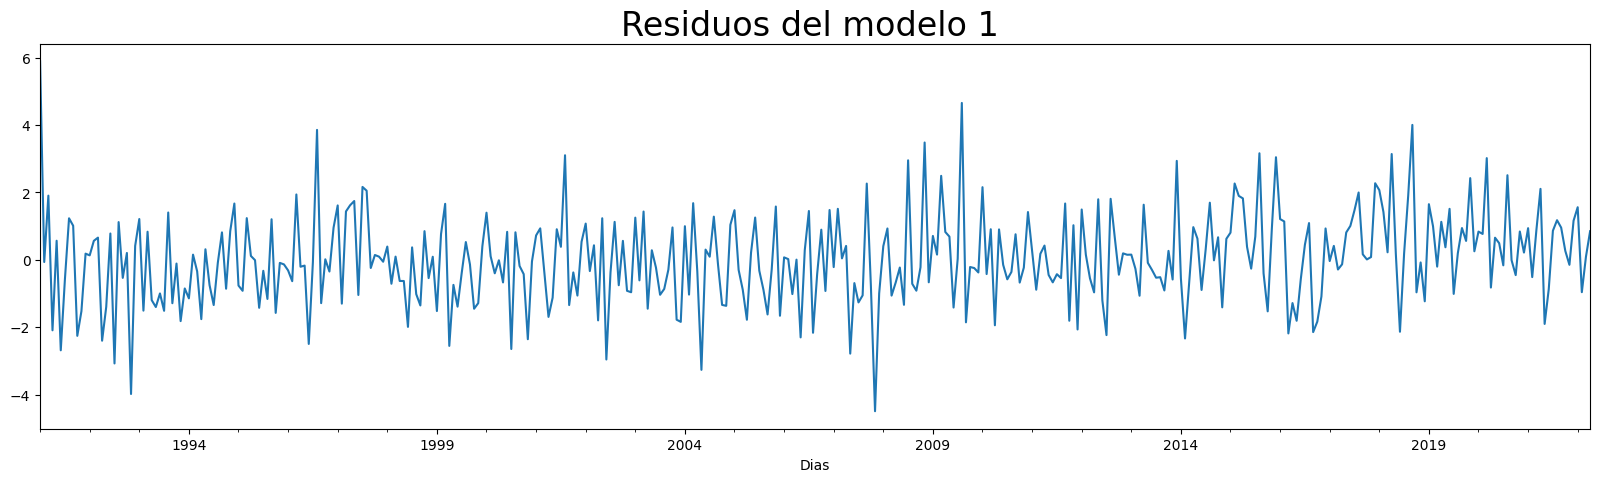

In [ ]:
resultado1.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo 1 ",size=24)
plt.show()

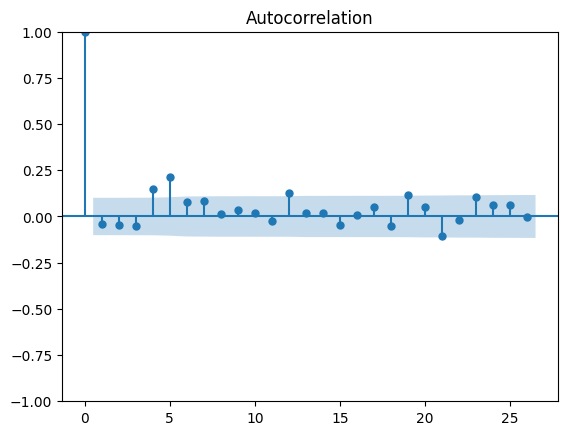

In [ ]:
plot_acf(resultado1.resid);

In [ ]:
import statsmodels.api as sm
Incorr_residuos_modelo1=sm.stats.acorr_ljungbox(resultado1.resid, lags=30)
Incorr_residuos_modelo1

,lb_stat,lb_pvalue
1,0.616423,0.432380
2,1.412024,0.493609
3,2.503262,0.474702
4,11.110430,0.025351
5,28.524319,0.000029
6,30.778625,0.000028
7,33.624540,0.000020
8,33.693887,0.000046
9,34.197780,0.000082
10,34.334454,0.000162


Text(0, 0.5, 'P-valores ')

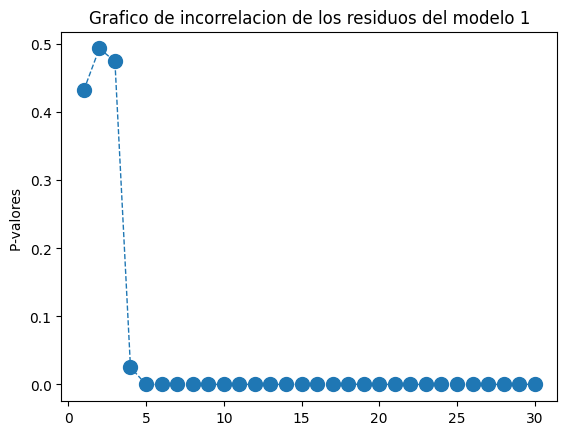

In [ ]:
plt.plot(Incorr_residuos_modelo1.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo 1")
plt.ylabel("P-valores ")

Modelo 2

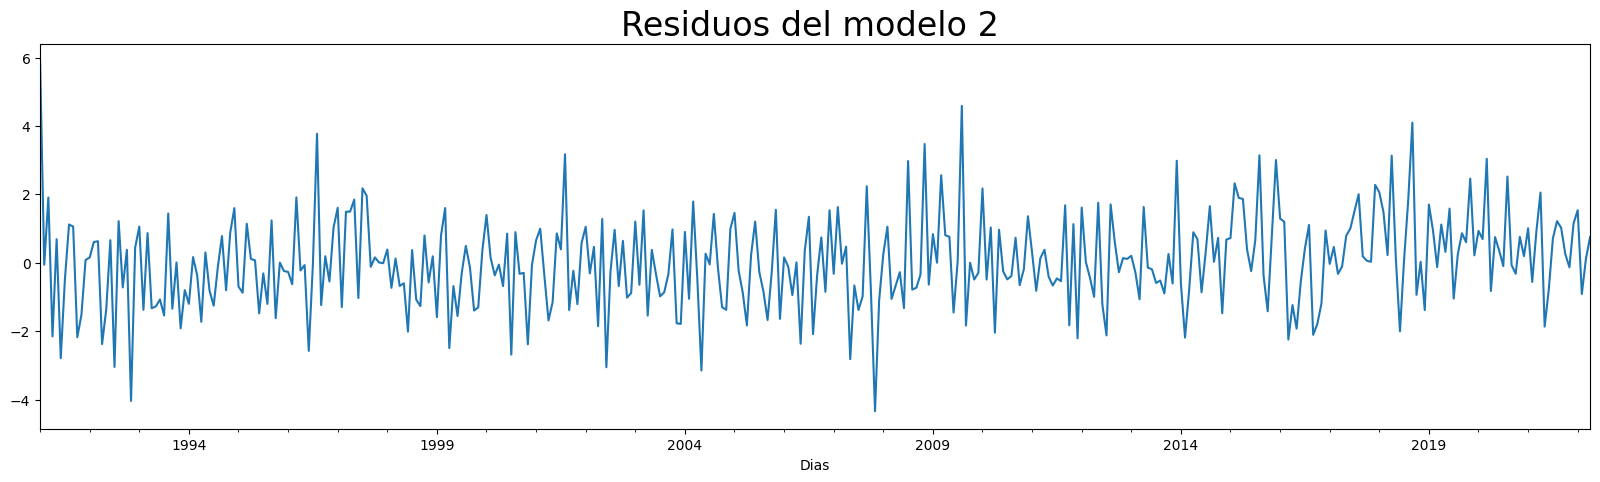

In [ ]:
resultado2.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo 2 ",size=24)
plt.show()

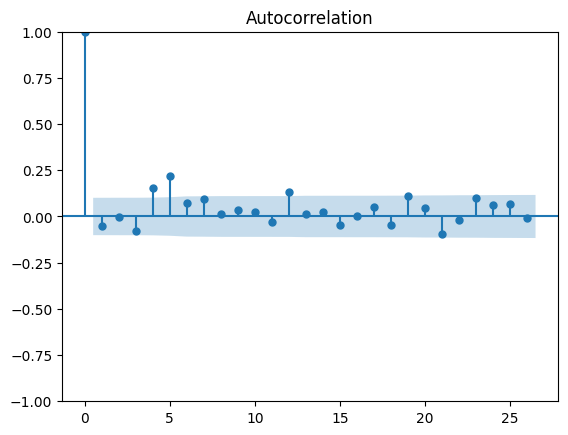

In [ ]:
plot_acf(resultado2.resid);

In [ ]:
import statsmodels.api as sm
Incorr_residuos_modelo2=sm.stats.acorr_ljungbox(resultado2.resid, lags=30)
Incorr_residuos_modelo2



,lb_stat,lb_pvalue
1,1.102577,0.293701
2,1.112386,0.573388
3,3.603684,0.307562
4,12.394184,0.014649
5,30.955188,0.000010
6,33.015945,0.000010
7,36.325839,0.000006
8,36.380799,0.000015
9,36.788742,0.000029
10,36.970691,0.000057


Text(0, 0.5, 'P-valores ')

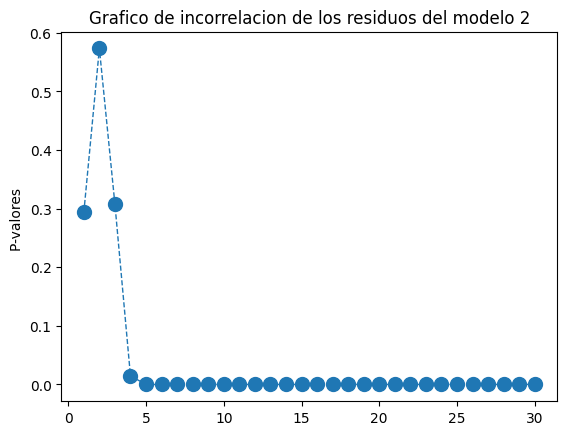

In [ ]:
plt.plot(Incorr_residuos_modelo2.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo 2")
plt.ylabel("P-valores ")

Modelo 3

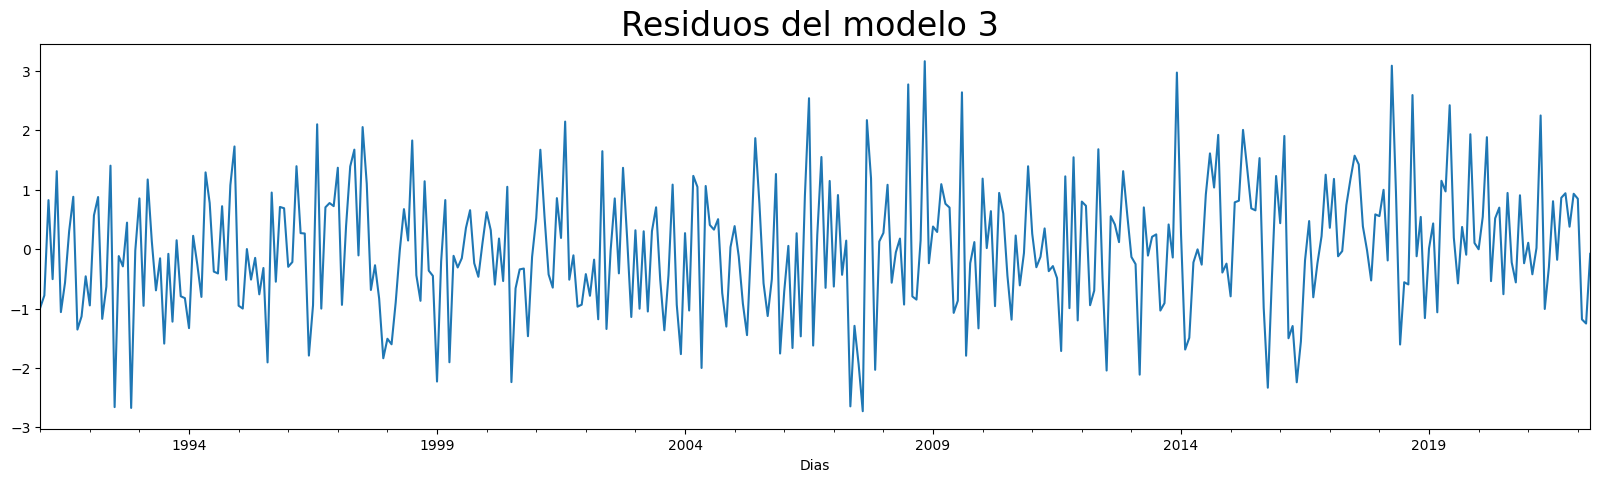

In [ ]:
resultado3.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo 3 ",size=24)
plt.show()

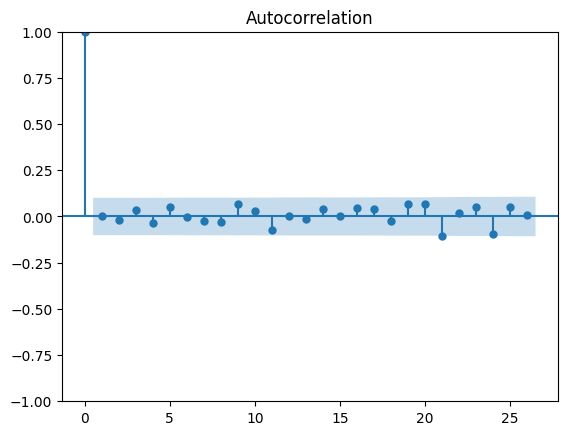

In [ ]:
plot_acf(resultado3.resid);

In [ ]:
import statsmodels.api as sm
Incorr_residuos_modelo3=sm.stats.acorr_ljungbox(resultado3.resid, lags=30)
Incorr_residuos_modelo3

,lb_stat,lb_pvalue
1,0.005127,0.942920
2,0.176689,0.915445
3,0.649813,0.884940
4,1.066142,0.899606
5,2.178714,0.823905
6,2.190200,0.901401
7,2.426703,0.932515
8,2.834878,0.944288
9,4.650189,0.863674
10,4.986261,0.892094


Text(0, 0.5, 'P-valores ')

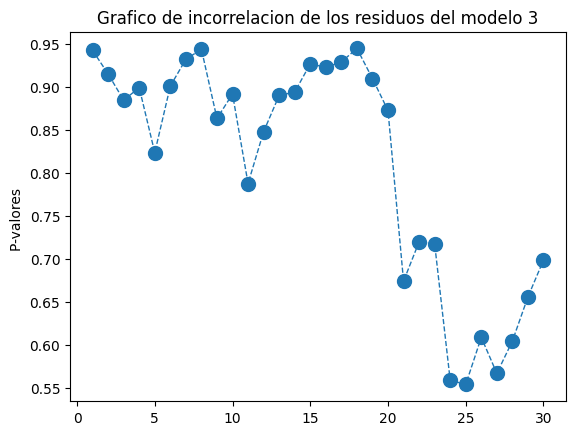

In [ ]:
plt.plot(Incorr_residuos_modelo3.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo 3")
plt.ylabel("P-valores ")



In [ ]:
# Pasamos a la prediccion
forecastA3 = resultado3.get_forecast(steps=24)



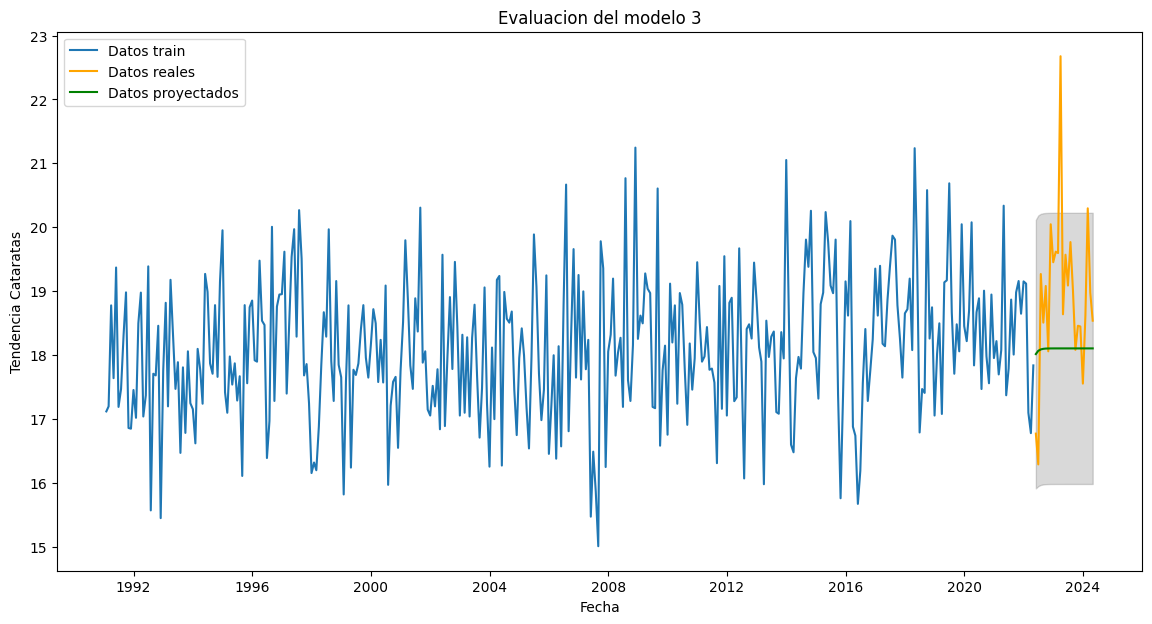

RMSE: 1.469545603052659
Mean Absolute Error (MAE): 1.1394683463749973
R² Score: -0.45483367511694683
Mean Absolute Percentage Error (MAPE): 0.05851293402911267


In [ ]:
test_forecast_series3 = pd.Series(forecastA3.predicted_mean, index=test.index)

mse = mean_squared_error(test_3['deseasonalizada'], test_forecast_series3)
rmse = mse**0.5

plt.figure(figsize=(14,7))
plt.plot(train_3['deseasonalizada'], label='Datos train')
plt.plot(test_3['deseasonalizada'], label='Datos reales', color='orange')
plt.plot(test_forecast_series3, label='Datos proyectados', color='green')
plt.fill_between(test_3.index,
                 forecastA3.conf_int().iloc[:, 0],
                 forecastA3.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('Evaluacion del modelo 3')
plt.xlabel('Fecha')
plt.ylabel('Tendencia Cataratas')
plt.legend()
plt.show()

print('RMSE:', rmse)

mae = mean_absolute_error(test_3['deseasonalizada'], test_forecast_series3)
r2 = r2_score(test_3['deseasonalizada'], test_forecast_series3)
mape = mean_absolute_percentage_error(test_3['deseasonalizada'], test_forecast_series3)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

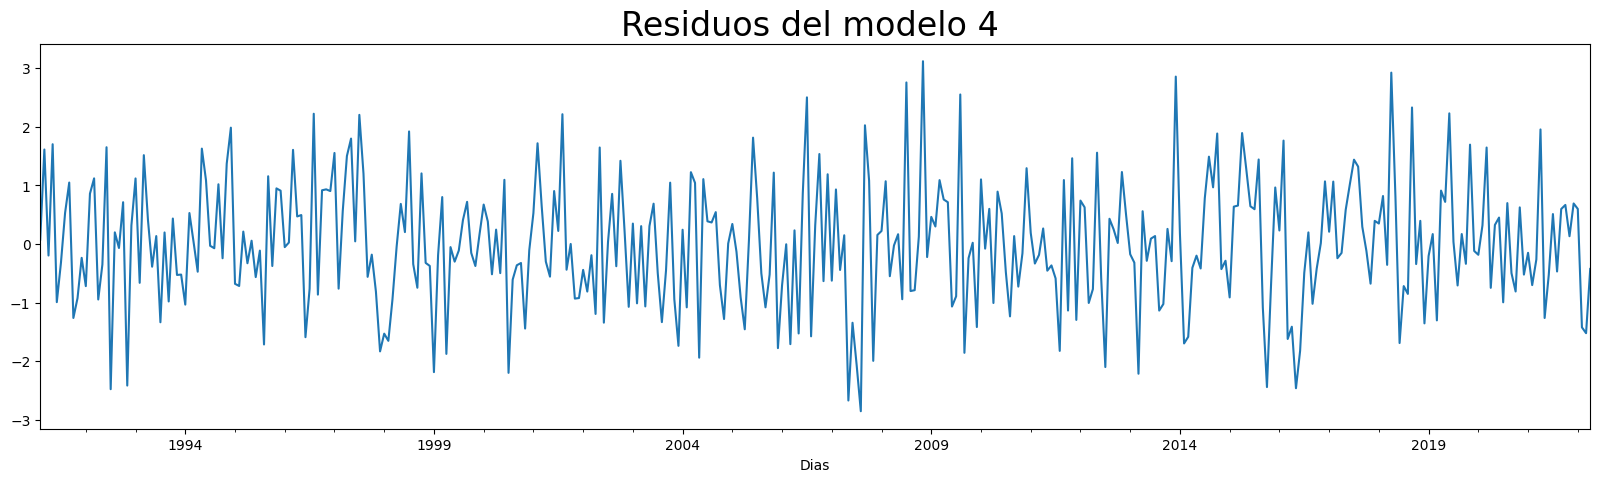

In [ ]:
resultado4.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo 4 ",size=24)
plt.show()

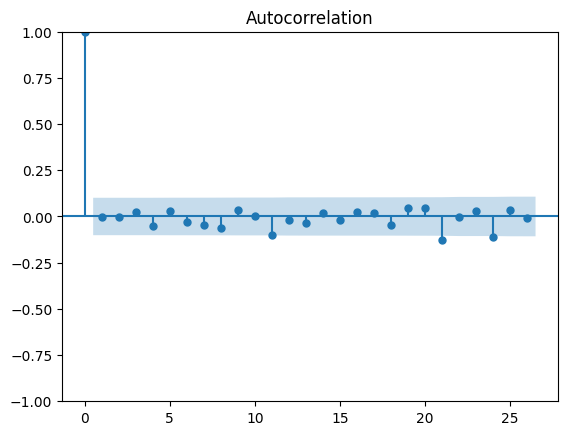

In [ ]:
plot_acf(resultado4.resid);

In [ ]:
import statsmodels.api as sm
Incorr_residuos_modelo4=sm.stats.acorr_ljungbox(resultado4.resid, lags=30)
Incorr_residuos_modelo4

,lb_stat,lb_pvalue
1,0.002872,0.957261
2,0.010886,0.994572
3,0.281490,0.963471
4,1.280242,0.864719
5,1.575057,0.904249
6,1.914990,0.927348
7,2.713609,0.910172
8,4.089007,0.849005
9,4.609265,0.866954
10,4.611295,0.915588


Text(0, 0.5, 'P-valores ')

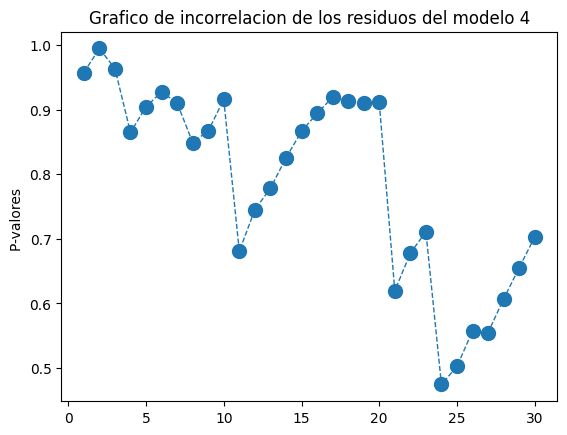

In [ ]:
plt.plot(Incorr_residuos_modelo4.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo 4")
plt.ylabel("P-valores ")

In [ ]:
# Pasamos a la prediccion
forecast4 = resultado4.get_forecast(steps=24)

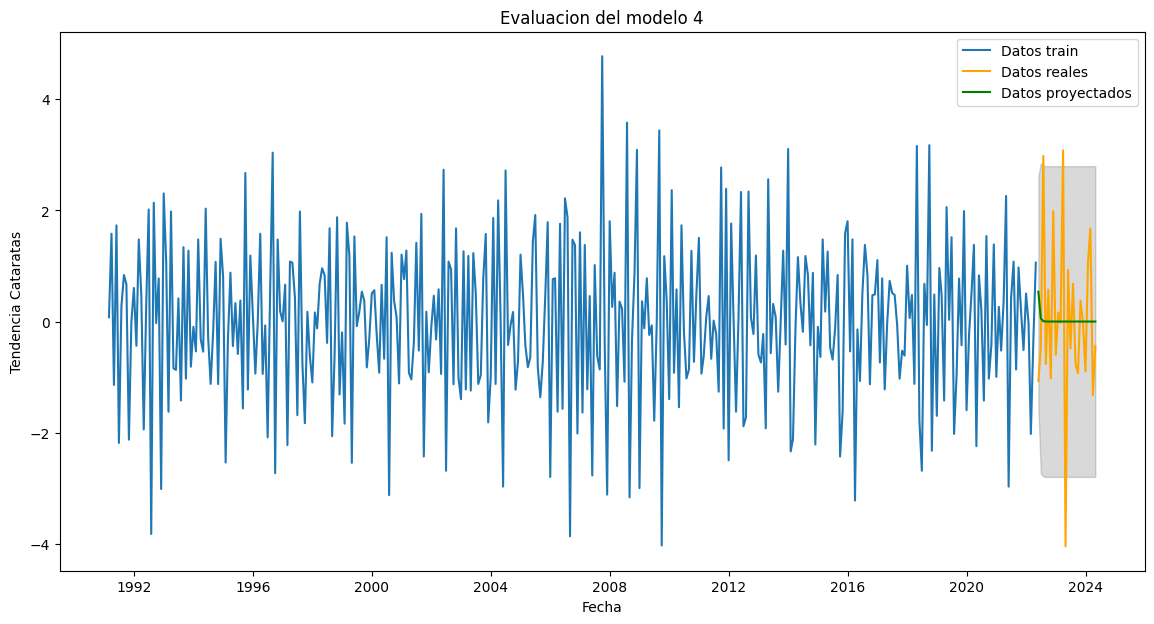

RMSE: 1.4949771532878027
Mean Absolute Error (MAE): 1.1224550251426495
R² Score: -0.02828290098133701
Mean Absolute Percentage Error (MAPE): 1.0359055567370452


In [ ]:
test_forecast_series4 = pd.Series(forecast4.predicted_mean, index=test.index)

mse = mean_squared_error(test_4['deseasonalizada'], test_forecast_series4)
rmse = mse**0.5

plt.figure(figsize=(14,7))
plt.plot(train_4['deseasonalizada'], label='Datos train')
plt.plot(test_4['deseasonalizada'], label='Datos reales', color='orange')
plt.plot(test_forecast_series4, label='Datos proyectados', color='green')
plt.fill_between(test.index,
                 forecast4.conf_int().iloc[:, 0],
                 forecast4.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('Evaluacion del modelo 4')
plt.xlabel('Fecha')
plt.ylabel('Tendencia Cataratas')
plt.legend()
plt.show()

print('RMSE:', rmse)

mae = mean_absolute_error(test_4['deseasonalizada'], test_forecast_series4)
r2 = r2_score(test_4['deseasonalizada'], test_forecast_series4)
mape = mean_absolute_percentage_error(test_4['deseasonalizada'], test_forecast_series4)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Modelo anterior

RMSE: 1.469545603052659
Mean Absolute Error (MAE): 1.1394683463749973
R² Score: -0.45483367511694683
Mean Absolute Percentage Error (MAPE): 0.05851293402911267


El modelo anterior es posiblemente mejor en lineas generales ya que tiene un RMSE más bajo, un MAPE mucho más bajo, y aunque tiene un MAE un poco más alto, las otras métricas favorecen su rendimiento.